#imports and setup

In [1]:
import numpy as np
import os
from IPython.display import Image
import matplotlib
from matplotlib.pyplot import imshow
from PIL import Image
os.chdir('/users/ironstein/documents/projects working directory/handwriting recognition using neural networks on FPGA final year project/image processing')

# image processing.py

In [2]:
class image_processing() : 
    
    def __init__(self) : 
        pass
    
    def convolution(self,image,kernel) : 
        
        scaling_factor = kernel[0]
        kernel = kernel[1]
        image_width = len(image[0])
        image_height = len(image)
        kernel_width = len(kernel[0])
        kernel_height = len(kernel)

        return_image = []

        def element_wise_matrix_multiplication(matrix1,matrix2,scaling_factor=1) :
            return_value = 0
            for m1_row,m2_row in zip(matrix1,matrix2) :
                for m1_pixel,m2_pixel in zip(m1_row,m2_row) :
                    return_value += int(m1_pixel)*int(m2_pixel)
            return np.uint8(return_value/scaling_factor)
                
        for row in range(image_height - kernel_height + 1) :
            return_image.append([])
            for pixel in range(image_width - kernel_width + 1) :
                image_slice = [[image[i,j] for j in range(pixel,pixel + kernel_width)]\
                               for i in range(row,row + kernel_height)]
                #print(image_slice)
                return_image[-1].append(element_wise_matrix_multiplication(image_slice,kernel,scaling_factor))
        return np.array(return_image)
    
    def rgb_to_greyscale(self,image) : 
        return_image = []
        for row in image : 
            return_image.append([])
            for pixel in row : 
                try : 
                    [r,g,b,s] = pixel
                except ValueError : 
                    [r,g,b] = pixel
                return_image[-1].append(np.uint8((int(r)+int(g)+int(b))/3))
        return np.array(return_image)
    

In [11]:
def display(image) : 
    if type(image) is type([]) : 
        number_of_plots = len(image)/2
        j = 0
        for i in range(0,number_of_plots,2) :
            j += 1
            matplotlib.pyplot.addsubplot(int(str(number_of_plots) + 1 + str(j)))
            matplotlib.pyplot.title(image[i])
            matplotlib.pyplot.imshow(image[i+1],cmap=matplotlib.pyplot.get_cmap('gray'))
    else : 
        imshow(image,cmap=matplotlib.pyplot.get_cmap('gray'))

#original image

In [10]:
image = np.array(Image.open('sample images/sample_image.jpeg')) 

#imshow(image,cmap=matplotlib.pyplot.get_cmap('grey'))
impr = image_processing()
image = impr.rgb_to_greyscale(image)
imshow(image)
display(image)

IOError: [Errno 2] No such file or directory: 'sample images/sample_image.jpeg'

#vertical edge detection

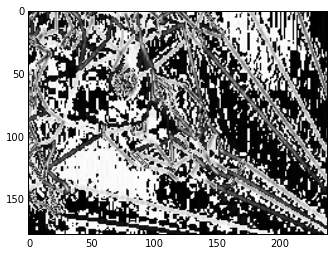

In [270]:
def vertical_edge_detection(self,image) : 
    kernel = [1,[[-1,0,1],
                 [-1,0,1],
                 [-1,0,1]]]
    processed_image = self.convolution(image,kernel)
    return processed_image
    
image_processing.vertical_edge_detection = vertical_edge_detection
impr = image_processing()
im = impr.vertical_edge_detection(image)
display(im)

#horizontal edge detection

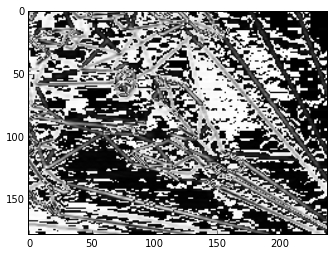

In [271]:
def horizontal_edge_detection(self,image) : 
    kernel = [1,[[-1,-1,-1],
                 [ 0, 0, 0],
                 [ 1, 1, 1]]]
    processed_image = self.convolution(image,kernel)
    return processed_image
    
image_processing.horizontal_edge_detection = horizontal_edge_detection
impr = image_processing()
im = impr.horizontal_edge_detection(image)
display(im)

#horizontal plus vertical edge detection

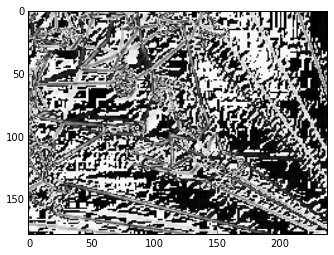

In [272]:
def horizontal_plus_vertical_edge_detection(self,image) :
    horizontal = self.horizontal_edge_detection(image)
    vertical = self.vertical_edge_detection(image)
    rows = len(horizontal)
    columns = len(horizontal[0])
    
    return_array = []
    for i in range(rows) :
        return_array.append([])
        for j in range(columns) : 
            return_array[-1].append(np.uint8(int(horizontal[i,j]) + int(vertical[i,j])))
    return np.array(return_array)

image_processing.horizontal_plus_vertical_edge_detection = horizontal_plus_vertical_edge_detection
impr = image_processing()
im = Image.fromarray(impr.horizontal_plus_vertical_edge_detection(image))
display(im)

#gaussian blur

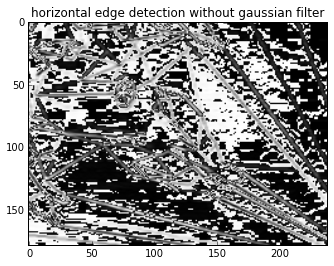

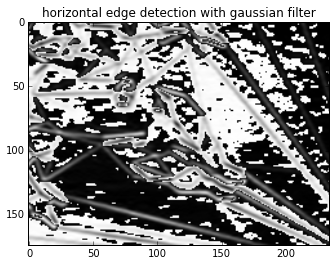

In [273]:
def gaussian_filter(self,image) : 
    kernel = [273,[[1,4 ,7 ,4 ,1],
                   [4,16,26,16,4],
                   [7,26,41,26,7],
                   [4,16,26,16,4],
                   [1,4 ,7 ,4 ,1]]]
    processed_image = self.convolution(image,kernel)
    return processed_image

image_processing.gaussian_filter = gaussian_filter
impr = image_processing()
im = impr.gaussian_filter(image)
display(['horizontal edge detection without gaussian filter',impr.horizontal_edge_detection(image),\
         'horizontal edge detection with gaussian filter',impr.horizontal_edge_detection(im)])